In [1]:
import numpy as np
import operator
from collections import defaultdict

In [2]:
def createDataset():
    groups = [[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]]
    labels = ['A','A','B','B',]         
    return groups,labels

In [3]:
groups,labels = createDataset()
groups

[[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]]

In [4]:
labels

['A', 'A', 'B', 'B']

In [5]:
def classify(x,dataset,labels,k):
    datasize = len(labels)
    diffmat = np.tile(x,(datasize,1))-dataset
    """
    np.tile(x,rep) 扩充x rep次。 
    https://numpy.org/doc/stable/reference/generated/numpy.tile.html?highlight=tile#numpy.tile
    """
    diffmat = diffmat**2
    distance = diffmat.sum(axis = 1)   # datasize*1
    distance = distance**0.5
    sortindex = distance.argsort(axis = 0)
    """
    array.atgsort() return 排序元素后对应的index 
    https://numpy.org/doc/stable/reference/generated/numpy.argsort.html?highlight=argsort#numpy-argsort
    """ 
    countdict = defaultdict(int)
    ans = 0
    res = -1
    for i in range(k):
        temp = labels[sortindex[i]]
        countdict[temp]+=1
        if countdict[temp]>=ans:
            ans = countdict[temp]
            res = temp
    return res

In [6]:
ans = classify([0,0],groups,labels,3)
ans

'B'

In [7]:
ans1 = classify([3,0],groups,labels,2)
ans1

'A'

In [8]:
def file2matrix(filename):
    f = open(filename,"r")
    arraylines = f.readlines()
    arraylength = len(arraylines)
    mat = np.zeros((arraylength,3))
    labels = [0]*arraylength
    for index,line in enumerate(arraylines):
        line = line.strip().split("\t")
        mat[index,:] = line[:-1]
        labels[index] = int(line[-1])
    return mat,labels
    

In [9]:
filename = './datingTestSet2.txt'
mat,labels = file2matrix(filename)

In [10]:
import matplotlib.pyplot as plt

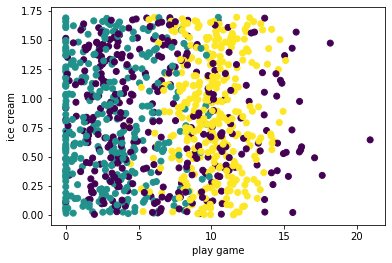

In [11]:
fig = plt.Figure()
ax = fig.add_subplot(111)
ax.scatter(mat[:,1],mat[:,2],c=15.0*np.array(labels))
ax.set_xlabel("play game")
ax.set_ylabel("ice cream")
fig

### 特征归一化
* 为什么我们要做特征归一化?  
我们发现不同特征相差的值对结果的影响不同，例如第一列数据的差值远大于第二列和第三列，而我们认为\
第一列和第二三列对我们来说一样重要，这种情况我们一般使用特征归一化。
* 怎么做归一化?  
newddate = (olddata-min)/(max-min)

In [12]:
def norm(mat):
    maxval = mat.max(0)  #沿着0轴方向求得到每列的最大元素
    minval = mat.min(0)
    rangeval = maxval-minval
    newmat = np.zeros(mat.shape)
    m = mat.shape[0]
    newmat = mat-np.tile(minval,(m,1))
    newmat /= np.tile(rangeval,(m,1))
    return newmat

In [13]:
newmat = norm(mat)
newmat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [21]:
def datingClasstest():
    testrate = 0.1
    filename = './datingTestSet2.txt'
    dataet,labels = file2matrix(filename)
    dataet = norm(dataet)
    size = dataet.shape[0]
    testsize = int(size*testrate)
    errorcount = 0
    for i in range(testsize):
        pre = classify(dataet[i,:],dataet[testsize:-1,:],labels[testsize:-1],3)
        print("pre is %d and real is %d"%(pre,labels[i]))
        if pre != labels[i]:errorcount+=1
    print("%d 数据的测试错误率为%d"%(testsize,errorcount/testsize))

In [22]:
datingClasstest()

3
pre is 3 and real is 3
2
pre is 2 and real is 2
1
pre is 1 and real is 1
1
pre is 1 and real is 1
1
pre is 1 and real is 1
1
pre is 1 and real is 1
3
pre is 3 and real is 3
3
pre is 3 and real is 3
1
pre is 1 and real is 1
3
pre is 3 and real is 3
1
pre is 1 and real is 1
1
pre is 1 and real is 1
2
pre is 2 and real is 2
1
pre is 1 and real is 1
1
pre is 1 and real is 1
1
pre is 1 and real is 1
1
pre is 1 and real is 1
1
pre is 1 and real is 1
2
pre is 2 and real is 2
3
pre is 3 and real is 3
2
pre is 2 and real is 2
1
pre is 1 and real is 1
1
pre is 1 and real is 2
3
pre is 3 and real is 3
2
pre is 2 and real is 2
3
pre is 3 and real is 3
2
pre is 2 and real is 2
3
pre is 3 and real is 3
2
pre is 2 and real is 2
1
pre is 1 and real is 1
3
pre is 3 and real is 3
1
pre is 1 and real is 1
3
pre is 3 and real is 3
1
pre is 1 and real is 1
2
pre is 2 and real is 2
1
pre is 1 and real is 1
1
pre is 1 and real is 1
2
pre is 2 and real is 2
3
pre is 3 and real is 3
3
pre is 3 and real is 3
